### Problem 3: Gaussian Process Regression Solution

In [1]:
# part a

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

m = 101
xs = np.linspace(-4, 4, m)  # Test input vector
mxs = np.zeros(m)  # Zero mean vector

In [3]:
# part b

In [4]:
l = np.sqrt(2)  # hyperparameters
sf2 = 1
Kss = sf2 * np.exp(-1 / (2 * l**2) * np.abs(xs[:, np.newaxis] - xs[:, np.newaxis].T)**2)

In [5]:
# part c

In [6]:
s = 25  # Draw samples from the prior
fs = multivariate_normal(mean=mxs, cov=Kss, allow_singular=True).rvs(s).T
print(fs)

[[-0.32692101  0.32098379 -0.65226036 ... -0.10467487  0.74880803
   0.14121336]
 [-0.3205167   0.27489615 -0.67448458 ... -0.13716458  0.70162335
   0.16814095]
 [-0.31251027  0.21972887 -0.70207693 ... -0.16297724  0.65114972
   0.19127032]
 ...
 [-0.68353584 -1.10640883  1.03879129 ...  0.25735365 -0.60399687
   1.01319684]
 [-0.72817855 -1.02218155  1.06981836 ...  0.26499503 -0.65867691
   1.12093829]
 [-0.76912362 -0.9250585   1.09476273 ...  0.2684212  -0.7120611
   1.21961246]]


In [7]:
# part d

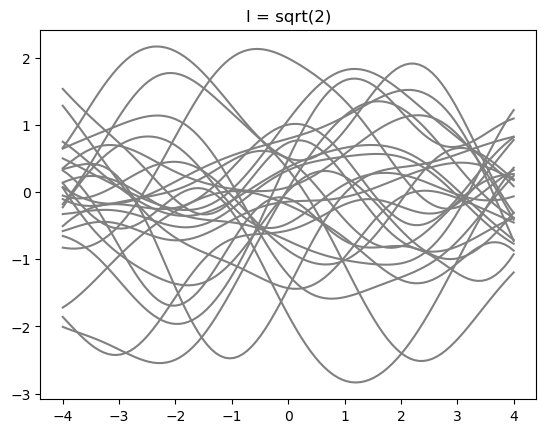

In [8]:
plt.plot(xs, fs, 'gray')  # Plot the samples
plt.title('l = sqrt(2)')
plt.show()

In [9]:
# part e

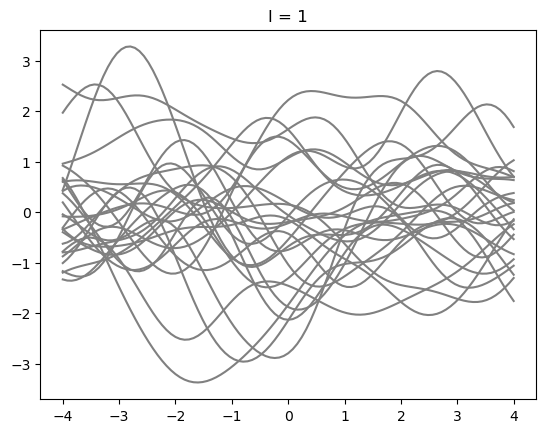

In [10]:
# Use another length scale
l = 1
Kss = sf2 * np.exp(-1 / (2 * l) * np.abs(xs[:, np.newaxis] - xs[:, np.newaxis].T)**2)
fs = multivariate_normal(mean=mxs, cov=Kss, allow_singular=True).rvs(s).T
plt.plot(xs, fs, 'gray')
plt.title('l = 1')
plt.show()

In [11]:
# part f

In [175]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Set seed for reproducibility
np.random.seed(42)

# Generate an array with 101 random values between -2 and 2
noise_level = 0.05  # Adjust the noise level as needed
noise = np.random.normal(loc=0, scale=noise_level, size=len(xs))
f = np.mean(fs,axis=1)+noise

train_size=0.5
train_len=np.rint(len(xs)*train_size)
xs_train = xs[:int(train_len)]
xs_test=xs[int(train_len):]
f_train = f[:int(train_len)]
f_test=f[int(train_len):]

In [176]:
# part g

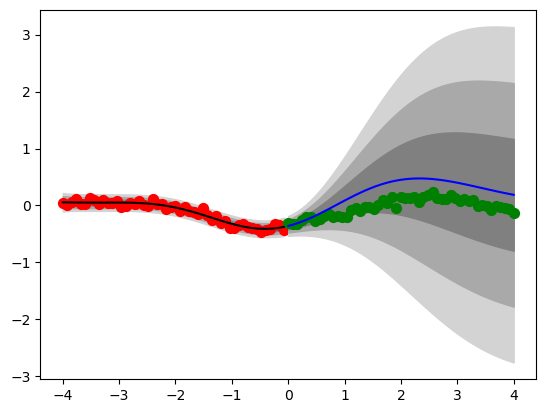

In [177]:
# With noise
kernel = RBF(length_scale=np.sqrt(2)) + WhiteKernel(noise_level=0.1,noise_level_bounds=(1e-10,1))
gp = GaussianProcessRegressor(kernel=kernel).fit(xs_train[:, np.newaxis], f_train)
f_mean, f_std = gp.predict(xs_train[:, np.newaxis], return_std=True)
plt.plot(xs_train, f_mean, 'k')
plt.fill_between(xs_train, f_mean - 3 * f_std, f_mean + 3 * f_std, color='lightgray')
plt.fill_between(xs_train, f_mean - 2 * f_std, f_mean + 2 * f_std, color='darkgray')
plt.fill_between(xs_train, f_mean - 1 * f_std, f_mean + 1 * f_std, color='gray')
plt.scatter(xs_train, f_train, c='r', s=50)
f_mean_test, f_std_test = gp.predict(xs_test[:, np.newaxis], return_std=True)
plt.plot(xs_test, f_mean_test, 'b')
plt.fill_between(xs_test, f_mean_test - 3 * f_std_test, f_mean_test + 3 * f_std_test, color='lightgray')
plt.fill_between(xs_test, f_mean_test - 2 * f_std_test, f_mean_test + 2 * f_std_test, color='darkgray')
plt.fill_between(xs_test, f_mean_test - 1 * f_std_test, f_mean_test + 1 * f_std_test, color='gray')
plt.scatter(xs_test, f_test, c='g', s=50)

plt.show()

In [178]:
# part h: Bonus

In [230]:
train_size=0.3
train_len=np.rint(len(xs)*train_size)
xs_train = np.concatenate((xs[:int(train_len)],xs[-1*int(train_len):]))
xs_test=xs[int(train_len):-1*int(train_len)]
f_train = np.concatenate((f[:int(train_len)],f[-1*int(train_len):]))
f_test=f[int(train_len):-1*int(train_len)]


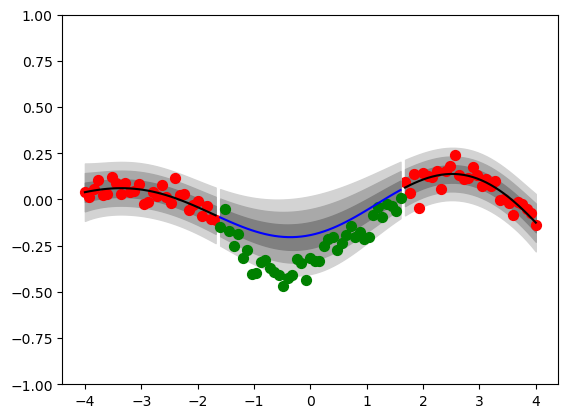

In [231]:
# With noise
fig, ax = plt.subplots()
kernel = RBF(length_scale=np.sqrt(2)) + WhiteKernel(noise_level=0.1,noise_level_bounds=(1e-10,1))
gp = GaussianProcessRegressor(kernel=kernel).fit(xs_train[:, np.newaxis], f_train)
f_mean, f_std = gp.predict(xs_train[:, np.newaxis], return_std=True)
plt.plot(xs_train[:30], f_mean[:30], 'k')
plt.fill_between(xs_train[:30], f_mean[:30] - 3 * f_std[:30], f_mean[:30] + 3 * f_std[:30], color='lightgray')
plt.fill_between(xs_train[:30], f_mean[:30] - 2 * f_std[:30], f_mean[:30] + 2 * f_std[:30], color='darkgray')
plt.fill_between(xs_train[:30], f_mean[:30] - 1 * f_std[:30], f_mean[:30] + 1 * f_std[:30], color='gray')
plt.plot(xs_train[-30:], f_mean[-30:], 'k')
plt.fill_between(xs_train[-30:], f_mean[-30:] - 3 * f_std[-30:], f_mean[-30:] + 3 * f_std[-30:], color='lightgray')
plt.fill_between(xs_train[-30:], f_mean[-30:] - 2 * f_std[-30:], f_mean[-30:] + 2 * f_std[-30:], color='darkgray')
plt.fill_between(xs_train[-30:], f_mean[-30:] - 1 * f_std[-30:], f_mean[-30:] + 1 * f_std[:30], color='gray')
plt.scatter(xs_train, f_train, c='r', s=50)
f_mean_test, f_std_test = gp.predict(xs_test[:, np.newaxis], return_std=True)
plt.plot(xs_test, f_mean_test, 'b')
plt.fill_between(xs_test, f_mean_test - 3 * f_std_test, f_mean_test + 3 * f_std_test, color='lightgray')
plt.fill_between(xs_test, f_mean_test - 2 * f_std_test, f_mean_test + 2 * f_std_test, color='darkgray')
plt.fill_between(xs_test, f_mean_test - 1 * f_std_test, f_mean_test + 1 * f_std_test, color='gray')
plt.scatter(xs_test, f_test, c='g', s=50)
ax.set_ylim((-1,1))
plt.show()